In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [5]:
mean_enc = titanic.copy()
means = mean_enc.Survived.groupby(mean_enc.Sex).mean()
mean_enc["Sex_enc"] = mean_enc.Sex.map(means)
display(mean_enc)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [6]:
embarked_onehot = titanic.copy()
from sklearn.preprocessing import OneHotEncoder
e = OneHotEncoder(sparse=False)
embarked_onehot.Embarked.fillna(embarked_onehot.Embarked.mode()[0], inplace=True)
encoded = e.fit_transform(embarked_onehot[['Embarked']]).astype(np.uint8)
pd.DataFrame(encoded)
cat = e.categories_[0].tolist()
embarked_ohe = pd.DataFrame(encoded, columns=cat)
embarked_onehot = embarked_onehot.drop(['Embarked'], axis=1)
embarked_onehot = pd.concat([embarked_onehot, embarked_ohe], axis=1, sort=False)
embarked_onehot = embarked_onehot.rename(columns={"C": "Embarked_C", "Q":"Embarked_Q", "S":"Embarked_S"})
display(embarked_onehot)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [7]:
from sklearn.preprocessing import LabelEncoder
cabin_enc = titanic.copy()
cabin_enc['Cabin'] = cabin_enc.Cabin.astype(str)
e = LabelEncoder()
cabin_enc['Cabin_enc'] = e.fit_transform(cabin_enc.Cabin)
display(cabin_enc)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,nan,S,147
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,nan,S,147
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,60


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

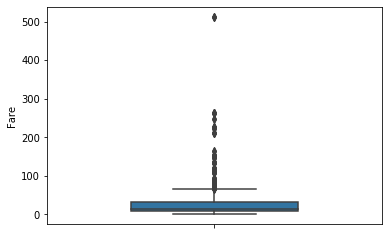

In [8]:
ax = sns.boxplot(x="Fare", data=titanic, orient='v', width=0.5)

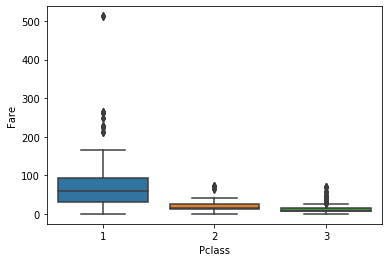

In [9]:
ax2 = sns.boxplot(x="Pclass", y='Fare', data=titanic)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [17]:
z_score = (titanic['Fare'] - titanic['Fare'].mean())/titanic['Fare'].std()

In [18]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

In [21]:
(z_score<-3) | (z_score>3)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [20]:
titanic['Fare'].min(), titanic['Fare'].max(), titanic.shape

(0.0, 512.3292, (891, 12))

### Notebookun bu noktasinda sonra kopyala-yapistir yapilmistir!!

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [32]:
upper_replace_value = titanic[z_score<=3]['Fare'].max()
lower_replace_value = titanic[z_score>=-3]['Fare'].min()

In [33]:
titanic_zscore_replaced = titanic.copy()
titanic_zscore_replaced['Fare'][z_score>3] = upper_replace_value
titanic_zscore_replaced['Fare'][z_score<-3] = lower_replace_value

/home/bdoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bdoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
titanic["Fare"].min(), titanic["Fare"].max()

(0.0, 512.3292)

In [35]:
titanic_zscore_replaced["Fare"].min(), titanic_zscore_replaced["Fare"].max(), titanic_zscore_replaced.shape

(0.0, 164.8667, (891, 12))

In [42]:
q1 = titanic["Fare"].quantile(q=0.25)
q3 = titanic["Fare"].quantile(q=0.75)
iqr = q3-q1
iqr
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
lower_limit, upper_limit
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [43]:
titanic_iqr_replaced = titanic.copy()
titanic_iqr_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_iqr_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit
titanic_iqr_replaced["Fare"] .min(), titanic_iqr_replaced["Fare"] .max(), titanic_iqr_replaced.shape
lower_limit = titanic["Fare"].quantile(q=0.01)
upper_limit = titanic["Fare"].quantile(q=0.99)
lower_limit, upper_limit
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])
titanic_he_replaced = titanic.copy()
titanic_he_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_he_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit
titanic_he_replaced["Fare"] .min(), titanic_he_replaced["Fare"] .max(), titanic_he_replaced.shape

/home/bdoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bdoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bdoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

(0.0, 249.00622000000033, (891, 12))

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [11]:
#python kodu buraya

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [12]:
#python kodu buraya

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?